Mariana Valenzuela Lafarga

12 de febrero del 2024

## A03- Programación Lineal

# Programación lineal

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="400px" height="125px" />

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/220px-3dpoly.svg.png" width="350px" height="125px" />


**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html
- http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf 

## 1. Apuntes históricos

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="200px" height="125px" />


- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Simplex-description-en.svg/240px-Simplex-description-en.svg.png" width="200px" height="125px" />

 $$ y \geq 3x + 4 $$

## 2. Problemas de programación lineal

### 2.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto debe de tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

1. Criterio de optimización 
Minimizar costo de producto final

2. Variables sobre las que tengo control
- $x_{a}$: cantidad de gramos de A
- $x_{b}$: cantidad de gramos de b

3. Funcion de costo
$$f(x_{a},x_b)= 0.6x_{a}+0.2{x_b}$$
4. El compuesto debe tener al menos 25g de proteina

$0.30 x_{a}+0.05x_{b} \geq 25$

5. El compuesto debe tener al menos 6g de grasa

$0.01 x_{a} + 0.07 x_{b} \geq 6$

6. El compuesto debe tener al menos 30g de azucar

$0.10 x_{a} + 0.10 x_{b} \geq 30$

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

def r1(xA):
    return (25-0.30*xA)/0.05
def r2(xA):
    return (6-0.01*xA)/0.07
def r3(xA):
    return (30-0.10*xA)/0.10

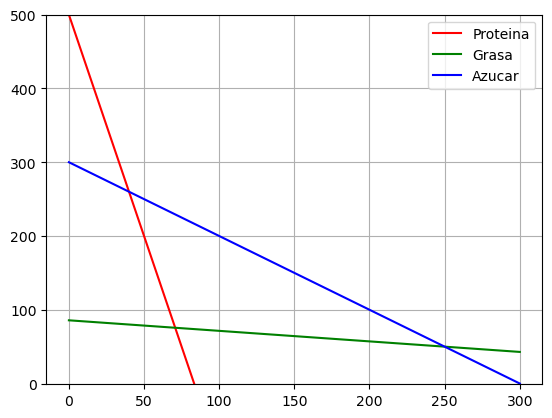

In [2]:
import numpy as np
xA= np.linspace(0,300,2)

plt.figure()
plt.plot(xA, r1(xA), "r", label= "Proteina")
plt.plot(xA, r2(xA), "g", label= "Grasa")
plt.plot(xA, r3(xA), "b", label= "Azucar")
plt.legend(loc="best")
plt.ylim([-1,500])
plt.grid()

In [12]:
import numpy as np
C= np.array([0.6,
            0.2])
Aub= np.array([
    [-0.30,-0.05],
    [-0.01,-0.07],
    [-0.10,-0.10]
])
bub= np.array([-25,
              -6,
              -30])

import scipy.optimize as opt
opt.linprog(C,Aub,bub)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: 76.0
       ineqlin:  marginals: array([-1.6, -0. , -1.2])
  residual: array([ 0. , 12.6,  0. ])
         lower:  marginals: array([0., 0.])
  residual: array([ 40., 260.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([ 0. , 12.6,  0. ])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([ 40., 260.])

Para hacer el nuevo producto se tienen que agregar 40 gramos del producto A y 260 gramos del producto B. De esta manera minimizamos el costo del producto final cumpliendo con las restricciones

### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves. 

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche. 

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias? 

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

- Definir criterio de optimización

Maximizar ganancias

- Variables que puedo controlar

$$C_{A}, C_{B}, A_{A}, A_{B}$$

- Funcion de coste

$$600 C_{A} + 600 C_{B} + 200 A_{A} + 200 A_{B}$$

- Restricciones

$$7 C_{A} + 2 A_{A} \leq  300$$
$$3 C_{A} + 3 A_{A} \leq  270$$

In [8]:
import numpy as np
c= np.array([-600,
            -600,
            -200,
            -200])
Aub= np.array([
    [7,0,2,0],
    [0,3,0,3]
])
bub= np.array([300,
              270])

import scipy.optimize as opt
opt.linprog(c,Aub,bub)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -84000.0
       ineqlin:  marginals: array([-100., -200.])
  residual: array([0., 0.])
         lower:  marginals: array([100.,   0.,   0., 400.])
  residual: array([  0.,  90., 150.,   0.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 0
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf])
             x: array([  0.,  90., 150.,   0.])

Se deben producir 0 camiones en A, 90 camiones en B, 150 autos en A y 0 autos en B. Con esto maximizamos las ganancias obtenidas

Resolviendo el problema 2 (Maximización de utilidad en carros y camiones), con la función `linprog`

## 3. ¿Cómo se resuelve en python?

### 3.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/_static/images/scipy_med.png" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería. 

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

In [4]:
import scipy.optimize as opt

# Importar el módulo optimize de la librería scipy

El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices. Entre ellas se encuentra la función `linprog`

---

In [5]:
opt.linprog?

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudihambre, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es $\$15$ en cada par de aretes y $\$20$ en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

**Diez minutos: quien primero lo haga, comparte pantalla para explicarlo y le subiré la nota de alguna tarea a 100.**

- Definir criterio de optimización

Maximizar utilidades

- Variables que puedo controlar

$$A, C$$

- Funcion de coste

$$15 A + 20 C$$

- Restricciones

$$ A+C \leq 15$$
$$ 30 A+ 60 C \leq 600$$

In [10]:
import numpy as np
U= np.array([-15,
            -20])
Aub= np.array([
    [1,1],
    [30,60]
])
bub= np.array([15,
              600])

import scipy.optimize as opt
opt.linprog(U,Aub,bub)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -250.0
       ineqlin:  marginals: array([-10.        ,  -0.16666667])
  residual: array([0., 0.])
         lower:  marginals: array([0., 0.])
  residual: array([10.,  5.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 2
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0.])
  residual: array([inf, inf])
             x: array([10.,  5.])

Monica debe hacer 10 aretes y 5 cadenitas para maximizar las utilidades

## 4. Problema de transporte 1
- **Referencia**: http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

Una  empresa tiene dos fábricas A y B.  En ellas  se fabrica un determinado  producto, a razón de 500  y 400 unidades por día respectivamente.  El producto  ha  de  ser distribuido posteriormente  a  tres  centros  C,  D  y  E,  que  requieren,  respectivamente,  200,  300  y  400  unidades.  Los  costos  de  transportar cada unidad del producto desde cada fábrica a cada centro distribuidor son los  indicados  en la tabla  siguiente: 

Factoría|C|D|E|Fabricación (Unidades)
:----|----|----|----|----
A|  50 u.m|60 u.m|10 u.m|500 u
B|  25 u.m|40 u.m|20 u.m|400 u
Demanda|200|300|400|

**¿De qué manera  deben  organizar  el transporte a fin de que los gastos sean mínimos?**


Formulemos el problema para ser resuelto por la programación lineal con
- $x_1$: unidades transportadas de la factoría "A" al centro "C"
- $x_2$: unidades transportadas de la factoría "A" al centro "D"
- $x_3$: unidades transportadas de la factoría "A" al centro "E"
- $x_4$: unidades transportadas de la factoría "B" al centro "C"
- $x_5$: unidades transportadas de la factoría "B" al centro "D"
- $x_6$: unidades transportadas de la factoría "B" al centro "E"

se tienen las siguientes ecuaciones:

Restricciones de la producción:

- $x_{AC} + x_{AD} + x_{AE} \leq 500$
- $x_{BC} + x_{BD} + x_{BE} \leq 400$

Restricciones del consumo:

- $x_{AC} + x_{BC} \geq 200$
- $x_{AD} + x_{BD} \geq 300$
- $x_{AE} + x_{BE} \geq 400$

La función objetivo será:

$$\min_{x_1,\dots,x_6}50x_{AC} + 60x_{AD} + 10x_{AE} + 25x_{BC} + 40x_{BD} + 20x_{BE}$$

Resolver con `linprog`

In [11]:
import numpy as np
U= np.array([50,
            60,
            10,
            25,
            40,
            20])
Aub= np.array([
    [1,1,1,0,0,0],
    [0,0,0,1,1,1]
])
bub= np.array([500,
              400])
Aeq= np.array([
    [1,0,0,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,0,0,1]])
beq= np.array([200,
              300,
              400])

import scipy.optimize as opt
opt.linprog(U,Aub,bub,Aeq, beq)

           con: array([0., 0., 0.])
 crossover_nit: 0
         eqlin:  marginals: array([45., 60., 10.])
  residual: array([0., 0., 0.])
           fun: 23000.0
       ineqlin:  marginals: array([ -0., -20.])
  residual: array([0., 0.])
         lower:  marginals: array([ 5.,  0.,  0.,  0.,  0., 30.])
  residual: array([  0., 100., 400., 200., 200.,   0.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 1
         slack: array([0., 0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf, inf, inf])
             x: array([  0., 100., 400., 200., 200.,   0.])

Para minimizar el costo de transporte tenemos que mandar 0 unidades de A a C, 100 unidades de A a D, 400 unidades de A a E, 200 unidades de B a C, 200 unidades de B a D y 0 unidades de B a E

## 5. Optimización de inversión en bonos

**Referencia:**

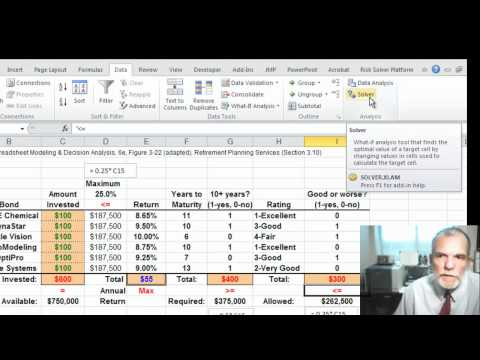

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('gukxBus8lOs')

El objetivo de este problema es determinar la mejor estrategia de inversión, dados diferentes tipos de bono, la máxima cantidad que puede ser invertida en cada bono, el porcentaje de retorno y los años de madurez. También hay una cantidad fija de dinero disponible ($\$750,000$). Por lo menos la mitad de este dinero debe ser invertido en bonos con 10 años o más para la madurez. Se puede invertir un máximo del $25\%$ de esta cantidad en cada bono. Finalmente, hay otra restricción que no permite usar más de $35\%$ en bonos de alto riesgo.

Existen seis (6) opciones de inversión con las letras correspondientes $A_i$

1. $A_1$:(Tasa de retorno=$8.65\%$; Años para la madurez=11, Riesgo=Bajo)
1. $A_2$:(Tasa de retorno=$9.50\%$; Años para la madurez=10, Riesgo=Alto)
1. $A_3$:(Tasa de retorno=$10.00\%$; Años para la madurez=6, Riesgo=Alto)
1. $A_4$:(Tasa de retorno=$8.75\%$; Años para la madurez=10, Riesgo=Bajo)
1. $A_5$:(Tasa de retorno=$9.25\%$; Años para la madurez=7, Riesgo=Alto)
1. $A_6$:(Tasa de retorno=$9.00\%$; Años para la madurez=13, Riesgo=Bajo)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

Este problema puede ser resuelto con programación lineal. Formalmente, puede ser descrito como:

$$\max_{A_1,A_2,...,A_6}\sum^{6}_{i=1} A_iR_i,$$

donde $A_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.

- Definir criterio de optimización

Maximizar retorno de la inversión

- Variables que puedo controlar

$$C_{1}, C_{2}, C_{3}, C_{4}, C_{5}, C_{6}$$

- Función de coste

$$0.0865 C_{1}+ 0.095 C_{2} + 0.10 C_{3} + 0.0875 C_{4} + 0.0925 C_{5} + 0.09 C_{6}$$

- Restricciones
$$ C_{1}+  C_{2} + C_{3} + C_{4} + C_{5} + C_{6} \leq 750000$$
$$ C_{1}+  C_{2} + C_{4} + C_{6} \geq 375000$$
$$ C_{1} \leq 187500$$
$$ C_{2} \leq 187500$$
$$ C_{3} \leq 187500$$
$$ C_{4} \leq 187500$$
$$ C_{5} \leq 187500$$
$$ C_{6} \leq 187500$$
$$ C_{2} + C_{3} + C_{5} \leq 262500$$

In [14]:
import numpy as np
R= np.array([-0.0865,
            -0.095,
            -0.10,
            -0.0875,
            -0.0925,
            -0.09])
Aub= np.array([
    [1,1,1,1,1,1],
    [-1,-1,0,-1,0,-1],
    [1,0,0,0,0,0],
    [0,1,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,1],
    [0,1,1,0,1,0]
])
bub= np.array([750000,
              -375000,
              187500,
              187500,
              187500,
              187500,
              187500,
              187500,
              262500])

import scipy.optimize as opt
opt.linprog(R,Aub,bub)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -68887.5
       ineqlin:  marginals: array([-0.0865, -0.    , -0.    , -0.    , -0.005 , -0.001 , -0.    ,
       -0.0035, -0.0085])
  residual: array([     0., 187500.,  75000., 112500.,      0.,      0., 187500.,
            0.,      0.])
         lower:  marginals: array([0.    , 0.    , 0.    , 0.    , 0.0025, 0.    ])
  residual: array([112500.,  75000., 187500., 187500.,      0., 187500.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 3
         slack: array([     0., 187500.,  75000., 112500.,      0.,      0., 187500.,
            0.,      0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf, inf, inf])
             x: array([112500.,  75000., 187500., 187500.,      0., 187500.

Se tiene que invertir 112500 en A1, 7500 en A2, 187500 en A3, 187500 en A4, 0 en A5 y 187500 en A6 todo esto para maximizar los rendimientos con las restricciones que tenemos